# Discrete Probabilistic Methods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

## Exercise 1
Discrete Data + Probability
- Use basic probability to i**dentify anomalous request methods**. You will want to make sure the text is normalized in order to reduce the noise.

In [2]:
df =pd.read_csv('curriculum-access.txt',sep=" ", header=None, names = ['data','time','destination','unknown_1','unknown_2','ip'])
df.head()

,data,time,destination,unknown_1,unknown_2,ip
0,2018-01-26,09:55:03,/,1,8.0,98.106.20.62
1,2018-01-26,09:56:02,java-ii,1,8.0,98.106.20.62
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62


- Convert time to date time

In [3]:
df['date_time'] = df["data"] + ' ' +df["time"]

df = df.drop(columns = ['data','time'])

In [4]:
# Convert to time stamp and from greenwich to central time zone
df['date_time'] = pd.to_datetime(df.date_time) - timedelta(hours=6)

df = df.set_index("date_time")
df.head()

,destination,unknown_1,unknown_2,ip
date_time,,,,
2018-01-26 03:55:03,/,1,8.0,98.106.20.62
2018-01-26 03:56:02,java-ii,1,8.0,98.106.20.62
2018-01-26 03:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
2018-01-26 03:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
2018-01-26 03:56:24,javascript-i/conditionals,2,22.0,98.106.20.62


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 543596 entries, 2018-01-26 03:55:03 to 2020-05-15 09:06:05
Data columns (total 4 columns):
destination    543595 non-null object
unknown_1      543596 non-null int64
unknown_2      515740 non-null float64
ip             543596 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 20.7+ MB


In [6]:
df.shape

(543596, 4)

### 1. Check anormaly on ip address.

In [7]:
ip_df =pd.DataFrame(df.ip.value_counts(dropna=False)).reset_index().rename(columns={'index': 'ip', 'ip': 'ip_count'})

ip_df2 = pd.DataFrame(df.ip.value_counts(dropna=False)/df.ip.count()).reset_index().\
                rename( columns={'index': 'ip', 'ip': 'ip_proba'})

ip_df = ip_df.merge(ip_df2)
ip_df

,ip,ip_count,ip_proba
0,98.106.20.59,284579,0.523512
1,98.106.20.62,61662,0.113434
2,193.172.118.211,9029,0.016610
3,13.107.209.195,4219,0.007761
4,173.125.68.94,2980,0.005482
...,...,...,...
3490,200.117.116.148,1,0.000002
3491,73.129.132.67,1,0.000002
3492,190.147.47.150,1,0.000002
3493,175.208.3.33,1,0.000002


3495


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

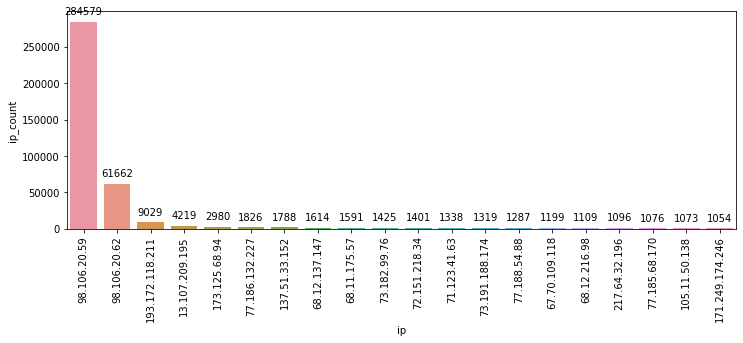

In [8]:
print(len(ip_df))


plt.figure(figsize=(12, 4))
splot = sns.barplot(data=ip_df.head(20), x = 'ip', y = 'ip_count', ci = None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), 
                   textcoords = 'offset points'
                   )

plt.xticks(rotation='vertical')

In [9]:
ip_df[ip_df.ip_proba< .00001]

,ip,ip_count,ip_proba
1863,200.117.116.132,5,0.000009
1864,100.204.27.57,5,0.000009
1865,108.78.218.129,5,0.000009
1866,72.41.250.35,5,0.000009
1867,73.191.233.109,5,0.000009
...,...,...,...
3490,200.117.116.148,1,0.000002
3491,73.129.132.67,1,0.000002
3492,190.147.47.150,1,0.000002
3493,175.208.3.33,1,0.000002


Takeaways :The number of clicks to the ds website does not really tell whether it is an anormaly becuase some people looked at it and did not show too much interest so they never come back again.


### 2. Check anormaly on unknow_1

In [10]:
df.unknown_1.isna().sum()

0

In [11]:
df.unknown_1.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [12]:
df.unknown_1.unique().shape

(650,)

There are 650 unique values, and they are uniformed, So it may represent the user Id.

In [13]:
df = df.rename(columns= {'unknown_1':'user'})

### 3. Check anormaly on unknown_2

In [14]:
df.unknown_2.isna().sum()

27856

In [15]:
np.sort(df.unknown_2.unique())

array([ 1.,  2.,  4.,  5.,  6.,  7.,  8.,  9., 11., 12., 13., 14., 15.,
       16., 17., 18., 19., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       31., 32., 33., 34., 51., 52., 53., 55., 56., 57., nan])

In [16]:
df = df.rename(columns= {'unknown_2':'cohort'})

1. The first anormaly I found is that we are misssing some cohorts
2. Some people whose cohort id is nan maybe the employees and some contractors

In [17]:
# how many users in each cohort?
df.groupby(['cohort']).user.nunique()

cohort
1.0     18
2.0      3
4.0      1
5.0      1
6.0      2
7.0      6
8.0      5
9.0      1
11.0     5
12.0     4
13.0    10
14.0    12
15.0     5
16.0     8
17.0    13
18.0    14
19.0    17
21.0    28
22.0    35
23.0    33
24.0    34
25.0    26
26.0    20
27.0    28
28.0    27
29.0    25
31.0    28
32.0    21
33.0    29
34.0    23
51.0    25
52.0    28
53.0    27
55.0    19
56.0    21
57.0    26
Name: user, dtype: int64

looks like first a few cohorts have very small number of students

In [18]:
df['2020-05-11':'2020-05-14'][df['2020-05-11':'2020-05-14'].destination.str.contains('timeseries')]

,destination,user,cohort,ip
date_time,,,,
2020-05-11 01:42:55,9-timeseries/1-overview,589,55.0,71.131.128.114
2020-05-11 01:59:31,9-timeseries/1-overview,589,55.0,71.131.128.114
2020-05-11 02:04:41,9-timeseries/1-overview,617,55.0,65.251.10.182
2020-05-11 02:06:31,9-timeseries/2-acquire,480,34.0,76.2.167.164
2020-05-11 02:17:27,9-timeseries/1-overview,586,55.0,68.11.170.7
...,...,...,...,...
2020-05-14 11:12:41,9-timeseries/5.2-modeling-lesson2,248,28.0,174.174.116.202
2020-05-14 16:04:32,9-timeseries/5.2-modeling-lesson2,576,55.0,100.127.114.141
2020-05-14 16:05:00,9-timeseries/project,576,55.0,100.127.114.141


In [19]:
df['2020-05-11':'2020-05-14'][df['2020-05-11':'2020-05-14'].destination.str.contains('timeseries')].groupby(['cohort']).user.nunique()

cohort
28.0     3
34.0     2
55.0    16
Name: user, dtype: int64

So the curie is cohort 55

In [29]:
df['2020-05-15'][df['2020-05-15'].destination.str.contains('timeseries')].groupby(['cohort']).user.unique()

cohort
28.0                                              [1, 11]
34.0                                                [480]
55.0    [579, 584, 588, 616, 582, 590, 581, 575, 583, ...
Name: user, dtype: object

In [28]:
df[df.ip.str.contains('130.45')]


,destination,user,cohort,ip
date_time,,,,
